Use the Support Vector Machine and Multi-layer Perceptron algorithms, and the Data_Glioblastoma5Patients_SC.csv database to evaluate classification performance with:
a) Parameter optimization,
b) Apply techniques to solve the class imbalance problem present in the database.
Discuss the results obtained (different metrics).

In [82]:
# Basics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import time

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

# Helpers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
#Baseline Model with Multi-Layer Perceptrons

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils


In [5]:
#loading the data 
path = '/content/drive/MyDrive/Data_Glioblastoma5Patients_SC.csv'

In [6]:
#Read Source Data

df = pd.read_csv(path)
df.sample(15)

,A2M,AAAS,AAK1,AAMP,AARS,AARSD1,AASDH,AASDHPPT,AASS,AATF,...,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZXDC,ZYG11B,ZYX,ZZZ3,Classes
63,-3.801470,-3.889900,1.258804,-5.820241,1.416969,-3.699171,-2.473517,-4.354127,-6.493931,-2.570976,...,-1.821098,2.180999,-1.538324,6.349495,-1.558581,0.454326,-1.154539,1.699798,-2.149696,Class1
290,-3.801470,-3.889900,-0.850908,2.190294,-6.041792,-2.154692,5.058104,-4.354127,-3.089990,-2.570976,...,-1.821098,0.861739,-1.538324,-1.550699,-1.558581,2.760261,4.909288,-2.509017,-0.605217,Class4
128,-2.674314,-3.889900,-0.055176,3.154556,3.642761,-3.699171,4.978425,3.058244,-1.212349,3.396709,...,-1.821098,4.375684,-1.538324,-1.550699,6.739863,4.218079,-3.421540,5.800241,-2.149696,Class2
120,-2.143332,3.717784,1.502269,-5.820241,2.471458,2.883805,-2.473517,4.098263,1.176175,5.114322,...,-1.821098,3.703383,-1.538324,6.596238,0.850721,-3.068620,-1.012238,-2.509017,-2.149696,Class2
195,-1.603711,-3.889900,-0.042021,-5.820241,3.967560,-1.501412,6.798128,4.151104,-2.250695,-2.570976,...,-1.821098,-3.118284,-1.538324,-1.550699,-1.558581,-0.037344,-3.421540,-2.509017,2.093539,Class2
144,-0.636794,3.733579,-2.981386,2.358747,1.361727,3.283654,-2.473517,3.115732,2.759915,-2.570976,...,4.873492,-3.118284,-1.538324,-0.553650,-1.558581,-2.071570,-1.840513,-2.509017,-2.149696,Class2
288,-1.917654,-3.889900,-1.296707,3.908541,-6.041792,4.461673,-2.473517,-4.354127,-6.493931,-2.570976,...,5.303650,-3.024369,1.411443,-1.550699,-1.558581,-0.456988,1.155540,-2.509017,-2.149696,Class4
277,10.501657,-1.164396,-2.849664,2.139459,2.531382,4.112178,1.827562,2.042872,-6.493931,2.243263,...,-1.821098,1.833158,-1.538324,-1.550699,-1.558581,-3.068620,-2.468721,1.648167,-2.149696,Class3
113,-3.801470,-3.889900,-2.099074,3.229382,4.544584,1.980229,3.677886,4.086496,-6.493931,-2.570976,...,-1.821098,-1.761967,-1.538324,-1.550699,-1.558581,-1.853070,-3.421540,-2.509017,-2.149696,Class1
319,-3.801470,-3.889900,-2.600480,3.196299,4.073896,3.981592,-2.473517,-3.733708,3.081462,-2.570976,...,-0.768234,3.705724,-1.538324,-1.550699,-1.558581,-3.068620,-2.368677,-2.509017,6.550093,Class4


In [148]:
print(df.describe())

print(df.groupby('Classes').size())

                A2M          AAAS          AAK1          AAMP          AARS  \
count  4.300000e+02  4.300000e+02  4.300000e+02  4.300000e+02  4.300000e+02   
mean  -5.116023e-11  9.069777e-11  1.627909e-11 -7.674580e-11 -8.139630e-11   
std    4.907659e+00  3.641663e+00  2.474651e+00  3.563029e+00  3.909578e+00   
min   -3.801470e+00 -3.889900e+00 -3.985616e+00 -5.820241e+00 -6.041792e+00   
25%   -3.801470e+00 -3.889900e+00 -1.871573e+00 -3.807913e+00 -4.560471e+00   
50%   -3.801470e+00  4.099148e-01 -3.150282e-01  1.746972e+00  1.776033e+00   
75%    4.943281e+00  3.711243e+00  2.002047e+00  2.686033e+00  3.116038e+00   
max    1.170195e+01  5.840230e+00  5.389576e+00  4.520579e+00  6.366184e+00   

             AARSD1         AASDH      AASDHPPT          AASS          AATF  \
count  4.300000e+02  4.300000e+02  4.300000e+02  4.300000e+02  4.300000e+02   
mean  -1.302323e-10 -2.255812e-10 -2.325458e-12  5.814004e-11 -1.511620e-10   
std    3.317166e+00  2.883981e+00  3.759008e+00  3.

In [115]:
data = df
classes = pd.get_dummies(df['Classes'])
data['Classes'] = classes.values.argmax(1)
df

,A2M,AAAS,AAK1,AAMP,AARS,AARSD1,AASDH,AASDHPPT,AASS,AATF,...,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZXDC,ZYG11B,ZYX,ZZZ3,Classes
0,-3.801470,-3.889900,-3.985616,2.651558,2.170748,-2.550822,4.807330,3.961170,-0.192665,3.614482,...,2.909466,-3.118284,-1.538324,-1.550699,-1.558581,-1.920271,3.007439,-2.509017,-2.149696,0
1,-3.801470,-3.889900,-3.158708,2.358992,-6.041792,-0.056092,3.606735,-2.632250,2.249388,6.857517,...,-1.821098,-3.118284,-1.538324,-1.550699,-1.558581,-3.068620,2.539560,2.164481,-2.149696,0
2,-3.801470,-3.889900,1.733125,-5.820241,-6.041792,-0.576957,-2.473517,-4.354127,0.063178,-2.570976,...,-1.821098,5.521892,-1.538324,-1.550699,-1.558581,0.174665,-0.165409,0.734268,-2.149696,0
3,-3.801470,-3.889900,-1.665669,3.514271,-6.041792,-3.699171,4.509461,-4.354127,2.985972,-2.570976,...,4.952176,-0.854351,-1.538324,-1.550699,-1.558581,-3.068620,-1.884744,-2.509017,-2.149696,0
4,-3.801470,3.742495,-2.166992,-5.820241,2.094729,4.021873,5.535007,4.019633,2.560370,-2.570976,...,-1.821098,4.328808,-1.538324,7.021985,-1.558581,4.590946,-0.128456,-2.509017,-2.149696,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0.049047,3.802559,0.569558,2.277677,-3.588918,3.061068,4.605986,-4.354127,1.166017,-0.118102,...,5.350848,-3.118284,4.551806,-1.550699,2.681750,-0.615746,4.239365,-2.509017,-2.149696,4
426,-3.801470,-3.889900,3.696882,2.838116,-0.613635,-3.699171,-2.473517,-4.354127,-3.492236,-2.570976,...,-1.821098,-0.946852,6.505265,-1.550699,-1.558581,4.769359,5.488785,4.172381,0.851999,4
427,-0.264648,-3.889900,-1.092769,-1.215363,-6.041792,-3.699171,-2.473517,-4.354127,-3.613497,5.718222,...,-1.821098,0.418538,-1.538324,-1.550699,-1.558581,-3.068620,-0.541107,-2.509017,-2.149696,4
428,-3.801470,3.616363,2.991430,1.747092,3.499675,3.630346,-2.473517,-4.354127,2.362492,-2.570976,...,-1.821098,-1.910269,6.198089,-1.550699,-1.558581,-3.068620,-1.979868,-2.509017,-2.149696,4


In [116]:
#Identify features and labels

features = df.columns[:-1]
X = df[features].values
labels = df.columns[-1]
y = df[labels].values

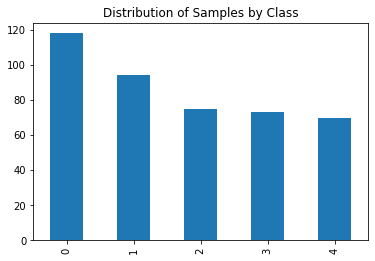

In [117]:
df['Classes'].value_counts().plot(kind='bar', title='Distribution of Samples by Class');

In [118]:
#Split data into features and labels (X and y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [119]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
print(f'Total samples in dataset: {len(df)}\n')
unique, frequency = np.unique(y_train, return_counts = True)
print(f'Class distribution for {len(y_train)} training samples:')
print(f'Class\tCount\tPercent')
for u, f in zip(unique, frequency):
    print(f'{u:>5}\t{f:>5}\t{f/frequency.sum():.1%}')
print()
unique, frequency = np.unique(y_test, return_counts = True)
print(f'Class distribution for {len(y_test)} testing samples:')
print(f'Class\tCount\tPercent')
for u, f in zip(unique, frequency):
    print(f'{u:>5}\t{f:>5}\t{f/frequency.sum():.1%}')

Total samples in dataset: 430

Class distribution for 322 training samples:
Class	Count	Percent
    0	   81	25.2%
    1	   71	22.0%
    2	   62	19.3%
    3	   59	18.3%
    4	   49	15.2%

Class distribution for 108 testing samples:
Class	Count	Percent
    0	   37	34.3%
    1	   23	21.3%
    2	   13	12.0%
    3	   14	13.0%
    4	   21	19.4%


In [121]:
tree = DecisionTreeClassifier() # decision tree algorithm
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [122]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.') 
print(f'Model Accuracy: {tree.score(X_train, y_train)}')

Decision tree has 35 nodes with maximum depth 6.
Model Accuracy: 1.0


In [123]:
y_pred = tree.predict(X_test) 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        37
           1       0.79      0.96      0.86        23
           2       0.92      0.85      0.88        13
           3       0.86      0.86      0.86        14
           4       0.89      0.81      0.85        21

    accuracy                           0.90       108
   macro avg       0.89      0.88      0.88       108
weighted avg       0.91      0.90      0.90       108



Here, from the confusion matrics of unseen data of decision tree we see that the accuracy for the given data is 90%.precision for class 0 and 2 is 1.  recall for class2 is 1, f1-score for calss2 is also 1.

# Support Vector **Machine**
Parameter optimization

In [128]:
from sklearn.svm import SVC
model = SVC()

In [129]:
#generating the model
cls = svm.SVC(kernel='poly', degree=4)

In [130]:
cls.fit(X_train, y_train)

SVC(degree=4, kernel='poly')

In [131]:
pred = cls.predict(X_test)

In [132]:
print(metrics.classification_report(y_test,y_pred=pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.05        37
           1       0.22      1.00      0.36        23
           2       1.00      0.08      0.14        13
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        21

    accuracy                           0.23       108
   macro avg       0.44      0.22      0.11       108
weighted avg       0.51      0.23      0.11       108



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
 #generating the model
cls = svm.SVC(kernel='linear', gamma=15, C=2)

In [134]:
# train the model
cls.fit(X_train, y_train)

SVC(C=2, gamma=15, kernel='linear')

In [135]:
# predict the response 
pred = cls.predict(X_test)

In [136]:
print("accuracy:", metrics.accuracy_score(y_test,y_pred=pred))

accuracy: 1.0


In [137]:
print(metrics.classification_report(y_test,y_pred=pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        21

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



By using support vector machine karnel liner algorithm we can imporve the accuracy upto 100%. Where as karnel poly algorithm showing very low accuracy 23%.





**Multi-layer Perceptron algorithms**



In [138]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=500, activation='relu')
mlp

MLPClassifier(max_iter=500)

In [139]:
mlp = MLPClassifier(hidden_layer_sizes=(3,2),max_iter=500, activation='relu')
mlp

MLPClassifier(hidden_layer_sizes=(3, 2), max_iter=500)

In [140]:
mlp.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(3, 2), max_iter=500)

In [141]:
pred = mlp.predict(X_test)
pred

array([4, 1, 1, 1, 4, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 3,
       4, 0, 1, 1, 1, 4, 2, 2, 1, 2, 3, 1, 4, 0, 1, 3, 0, 4, 2, 1, 1, 0,
       4, 1, 3, 1, 4, 4, 0, 4, 1, 1, 0, 2, 2, 0, 1, 0, 1, 3, 0, 1, 4, 1,
       4, 1, 1, 1, 1, 4, 0, 4, 4, 2, 0, 0, 2, 1, 0, 4, 0, 1, 1, 1, 0, 1,
       4, 1, 0, 3, 1, 2, 4, 3, 3, 3, 1, 1, 2, 3, 4, 3, 1, 4, 1, 3])

In [142]:
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix(y_test,pred)

array([[16, 20,  0,  0,  1],
       [ 0, 23,  0,  0,  0],
       [ 0,  0, 13,  0,  0],
       [ 1,  1,  0, 12,  0],
       [ 0,  0,  0,  0, 21]])

In [143]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.43      0.59        37
           1       0.52      1.00      0.69        23
           2       1.00      1.00      1.00        13
           3       1.00      0.86      0.92        14
           4       0.95      1.00      0.98        21

    accuracy                           0.79       108
   macro avg       0.88      0.86      0.84       108
weighted avg       0.87      0.79      0.78       108



We can see that using multi layer Perceptrons from the confusion matrics the accuracy is 79%. which is very low. We need to optimiz it by solving the class imblance problem.

**Class imbalance problem**

In [99]:
#Counts of classes in data
df['Classes'].value_counts()

Class1    118
Class2     94
Class3     75
Class4     73
Class5     70
Name: Classes, dtype: int64

In [100]:
df_resample = pd.read_csv(path)

In [101]:
#Sampling
from sklearn.utils import resample


df_class1 = resample(df_resample[df_resample['Classes']== 'Class1'],
               replace=True,
               n_samples=118,
               random_state=98)

df_class2 = resample(df_resample[df_resample['Classes']=='Class2'],
               replace=True,
               n_samples=118,
               random_state=98)

df_class3 = resample(df_resample[df_resample['Classes']=='Class3'],
               replace=True,
               n_samples=118,
               random_state=98)

df_class4 = resample(df_resample[df_resample['Classes']=='Class4'],
               replace=True,
               n_samples=118,
               random_state=98)

df_class5 = resample(df_resample[df_resample['Classes']=='Class5'],
               replace=True,
               n_samples=118,
               random_state=98)

df_resample= pd.concat([df_class1, df_class2, df_class3, df_class4, df_class5])
df_resample['Classes'].value_counts()

Class1    118
Class2    118
Class3    118
Class4    118
Class5    118
Name: Classes, dtype: int64

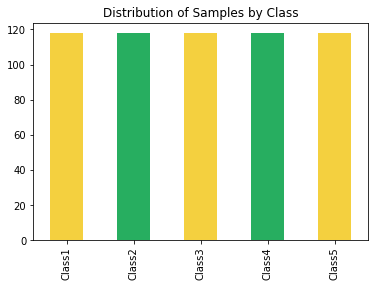

In [102]:
df_resample['Classes'].value_counts().plot(kind='bar', 
color = ['#F4D03F','#27AE60'], title='Distribution of Samples by Class');

Resample Data Split/Transform and Feature **Selection**

In [103]:
X = df_resample.drop(['Classes'], axis=1)
y = df_resample['Classes']

In [104]:
# Splitting the dataset to Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size= 0.2, random_state= 42, stratify=y)

#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(472, 5948)
(472,)
(118, 5948)
(118,)


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


In [106]:
y_train.value_counts()

Class2    89
Class5    89
Class4    88
Class1    88
Class3    88
Name: Classes, dtype: int64

In [107]:
tree = DecisionTreeClassifier() # decision tree algorithm
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [108]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.') 
print(f'Model Accuracy: {tree.score(X_train, y_train)}')

Decision tree has 29 nodes with maximum depth 7.
Model Accuracy: 1.0


In [109]:
y_pred = tree.predict(X_test) 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Class1       1.00      0.97      0.98        30
      Class2       0.93      0.97      0.95        29
      Class3       1.00      1.00      1.00        30
      Class4       0.91      1.00      0.95        30
      Class5       0.92      0.83      0.87        29

    accuracy                           0.95       148
   macro avg       0.95      0.95      0.95       148
weighted avg       0.95      0.95      0.95       148



Here  we see that by solving the imblance problem we can increse the accuracy for the given data is 95% perfect which is very high.precision, recall, f1-score is also incresed.